# Model comparison with Scikit-NeuroMSI

This tutorial covers the basic pipeline for comparing model performance on multisensory integration experiments using `Scikit-NeuroMSI`. We show how we can streamline model comparison by leveraging the `ParameterSweep` class and the built-in plotting functions of the `NDResultCollection` objects. 

## Bias and Causal Inference performance comparison

Here we compare the responses of the `Kording2007` and the `Cuppini2017` models in a spatial disparity paradigm. First we implement the models, setup the experiment and run the simulations:

In [ ]:
from skneuromsi.bayesian import Kording2007
from skneuromsi.neural import Cuppini2017
from skneuromsi.sweep import ParameterSweep
import numpy as np

# Models setup
model_kording = Kording2007(position_range=(0, 90), position_res=1, n=100000)
model_cuppini2017 = Cuppini2017(
    neurons=90, position_range=(0, 90), position_res=1
)

# Experiment setup
spatial_disparities = np.array([-24, -12, -6, -3, 3, 6, 12, 24])
sp_kording = ParameterSweep(
    model=model_kording,
    target="visual_position",
    repeat=1,
    range=45 + spatial_disparities,
)

sp_cuppini2017 = ParameterSweep(
    model=model_cuppini2017,
    target="visual_position",
    repeat=1,
    range=45 + spatial_disparities,
)

## Experiment run
res_kording = sp_kording.run(
    auditory_position=45,
    auditory_sigma=32,
    visual_sigma=4,
    prior_mu=45,
    prior_sigma=30,
    noise=True,
)

res_cuppini2017 = sp_cuppini2017.run(
    auditory_position=45, auditory_sigma=32, visual_sigma=4, noise=False
)

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

>**Note:** For simplicity, we ran the network model without noise.

Now we generate a plot to visually compare the model performance in causal inference: 

Text(0, 0.5, 'unique causes (prop)')

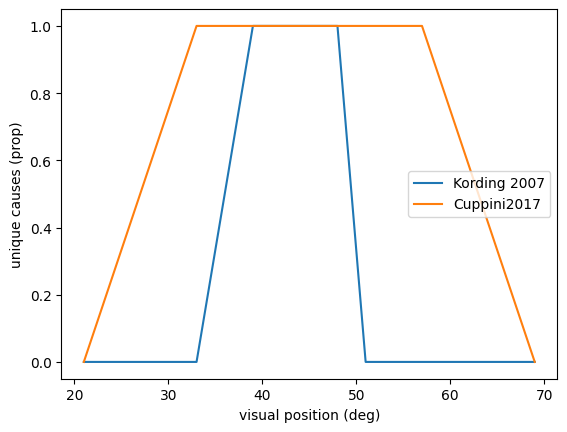

In [ ]:
import matplotlib.pyplot as plt

ax1 = plt.subplot()
res_kording.causes().plot(ax=ax1)
res_cuppini2017.causes().plot(ax=ax1)
ax1.legend(labels=["Kording 2007", "Cuppini2017"])
ax1.set_xlabel("visual position (deg)")
ax1.set_ylabel("unique causes (prop)")

Similarly, we can generate a plot to compare auditory bias in both models:

Text(0, 0.5, 'auditory bias (prop)')

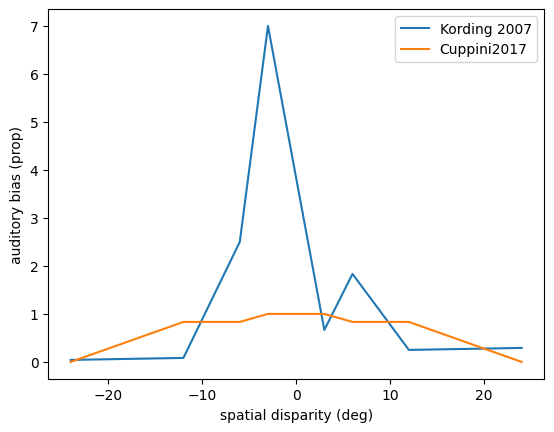

In [ ]:
ax2 = plt.subplot()
res_kording.bias(
    influence_parameter="auditory_position", mode="auditory"
).plot(ax=ax2)
res_cuppini2017.bias(
    influence_parameter="auditory_position", mode="auditory"
).plot(ax=ax2)
ax2.legend(labels=["Kording 2007", "Cuppini2017"])
ax2.set_xlabel("spatial disparity (deg)")
ax2.set_ylabel("auditory bias (prop)")